# Library

In [2]:
#General Header 
import rospy
import jupyros as jr 
import ipywidgets as widgets
import sys
import matplotlib.pyplot as plt                                                                     
import numpy as np

#Specific Header
from std_srvs.srv import *                                                       
from std_msgs.msg import String                                                   
from ipywidgets import Button, Output, Layout, ButtonStyle, GridBox, VBox, HBox  
from IPython.display import display                                              
from jupyros import ros3d                                                        
import os                                                                       
from nav_msgs.msg import Odometry                                                
from ipywidgets import interactive_output
from geometry_msgs.msg import Twist
#from rt2_assignment.srv import Command
from sensor_msgs.msg import LaserScan
from actionlib_msgs.msg import GoalStatusArray
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import MaxNLocator

# ros node initiation

In [3]:
rospy.init_node('jupyter_node')                                                 #link to 5°,6° section
rospy.init_node('odom_visualizer_node')                                         #link to 8° section

ROSException: rospy.init_node() has already been called with different arguments: ('jupyter_node', ['/home/barbod/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '-f', '/home/barbod/.local/share/jupyter/runtime/kernel-65313b75-a4f2-48c3-9925-34972424ebff.json'], False, None, False, False)

# Robot Behaivore 

In [4]:
RB = widgets.RadioButtons(
    options=['1.Entere coordinates','2.Driving with keyboards',
             '3.Driving & avoid obstacles' ],
#    value='Entere coordinates', # Defaults to 'Entere coordinates'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Choose robot behavior:',
    disabled=False
)
display(RB)

RadioButtons(description='Choose robot behavior:', options=('1.Entere coordinates', '2.Driving with keyboards'…

# Change State of Robot

In [5]:
if RB.value == '1.Entere coordinates':
    rospy.set_param('robot_state', '1')
elif RB.value == '2.Driving with keyboards':
    rospy.set_param('robot_state', '2')
elif RB.value == '3.Driving & avoid obstacles':
    rospy.set_param('robot_state', '3')
print("robot behaviour changed to: ")
print(RB.value)

robot behaviour changed to: 
2.Driving with keyboards


# Insert Goal 

In [ ]:
print("Insert coordinate in format x,y:\n")
jr.publish('/movebase_client_goal', String)

# Driving with keyboards

In [20]:
in1 = Button(description='u',layout=Layout(width='auto', grid_area='in1'),style=ButtonStyle(button_color='olive'))
out1 = Output()
in2 = Button(description='j',layout=Layout(width='auto', grid_area='in2'),style=ButtonStyle(button_color='olive'))
out2 = Output()
in3 = Button(description='m',layout=Layout(width='auto', grid_area='in3'),style=ButtonStyle(button_color='olive'))
out3 = Output()
in4 = Button(description='i',layout=Layout(width='auto', grid_area='in4'),style=ButtonStyle(button_color='olive'))
out4 = Output()
in5 = Button(description='k',layout=Layout(width='auto', grid_area='in5'),style=ButtonStyle(button_color='olive'))
out5 = Output()
in6 = Button(description=',',layout=Layout(width='auto', grid_area='in6'),style=ButtonStyle(button_color='olive'))
out6 = Output()
in7 = Button(description='o',layout=Layout(width='auto', grid_area='in7'),style=ButtonStyle(button_color='olive'))
out7 = Output()
in8 = Button(description='l',layout=Layout(width='auto', grid_area='in8'),style=ButtonStyle(button_color='olive'))
out8 = Output()
in9 = Button(description='.',layout=Layout(width='auto', grid_area='in9'),style=ButtonStyle(button_color='olive'))
out9 = Output()

def on_button_clicked1(in1):
    with out1:
        pub.publish('u')
def on_button_clicked2(in2):
    with out2:
        pub.publish('j')
def on_button_clicked3(in3):
    with out3:
        pub.publish('m')
def on_button_clicked4(in4):
    with out4:
        pub.publish('i')
def on_button_clicked5(in5):
    with out5:
        pub.publish('k')
def on_button_clicked6(in6):
    with out6:
        pub.publish(',')
def on_button_clicked7(in7):
    with out7:
        pub.publish('o')
def on_button_clicked8(in8):
    with out8:
        pub.publish('l')
def on_button_clicked9(in9):
    with out9:
        pub.publish('.')
        
in1.on_click(on_button_clicked1)
in2.on_click(on_button_clicked2)
in3.on_click(on_button_clicked3)
in4.on_click(on_button_clicked4)
in5.on_click(on_button_clicked5)
in6.on_click(on_button_clicked6)
in7.on_click(on_button_clicked7)
in8.on_click(on_button_clicked8)
in9.on_click(on_button_clicked9)

pub = rospy.Publisher('/teleop_input_key', String, queue_size=10)
print("input direction:")
HBox([VBox([in1, in2, in3]),VBox([in4, in5, in6]),VBox([in7, in8, in9])])


input direction:


In [19]:
in10 = Button(description='q',layout=Layout(width='auto', grid_area='in10'),style=ButtonStyle(button_color='green'))
out10 = Output()
in11 = Button(description='z',layout=Layout(width='auto', grid_area='in11'),style=ButtonStyle(button_color='red'))
out11 = Output()
in12 = Button(description='w',layout=Layout(width='auto', grid_area='in12'),style=ButtonStyle(button_color='green'))
out12 = Output()
in13 = Button(description='x',layout=Layout(width='auto', grid_area='in13'),style=ButtonStyle(button_color='red'))
out13 = Output()
in14 = Button(description='e',layout=Layout(width='auto', grid_area='in14'),style=ButtonStyle(button_color='green'))
out14 = Output()
in15 = Button(description='c',layout=Layout(width='auto', grid_area='in15'),style=ButtonStyle(button_color='red'))
out15 = Output()

def on_button_clicked10(in10):
    with out10:
        pub.publish('q')
def on_button_clicked11(in11):
    with out11:
        pub.publish('z')
def on_button_clicked12(in12):
    with out12:
        pub.publish('w')
def on_button_clicked13(in13):
    with out13:
        pub.publish('x')
def on_button_clicked14(in14):
    with out14:
        pub.publish('e')
def on_button_clicked15(in15):
    with out15:
        pub.publish('c')

in10.on_click(on_button_clicked10)
in11.on_click(on_button_clicked11)
in12.on_click(on_button_clicked12)
in13.on_click(on_button_clicked13)
in14.on_click(on_button_clicked14)
in15.on_click(on_button_clicked15)

pub = rospy.Publisher('/teleop_input_key', String, queue_size=10)
print("q/z increase/decrease max speeds by 10%")
print("w/x increase/decrease only linear speed by 10%")
print("e/c increase/decrease only angular speed by 10%")
HBox([VBox([in10, in11]),VBox([in12, in13]),VBox([in14, in15])])

#jr.publish('/cmd_vel',Twist)

q/z increase/decrease max speeds by 10%
w/x increase/decrease only linear speed by 10%
e/c increase/decrease only angular speed by 10%


# 3D Viewer

In [7]:
v = ros3d.Viewer()
rc = ros3d.ROSConnection(url="ws://localhost:9090")
tf_client = ros3d.TFClient(ros=rc, fixed_frame='map')
laser_view = ros3d.LaserScan(topic="/scan", ros=rc, tf_client=tf_client)
map_view = ros3d.OccupancyGrid(topic="/map", ros=rc, tf_client=tf_client)
path = ros3d.Path(topic="/move_base/NavfnROS/plan", ros=rc,
tf_client=tf_client)
urdf = ros3d.URDFModel(ros=rc, tf_client=tf_client,
path=os.environ.get('JUPYROS_ASSETS_URL', 'http://localhost:3000'))
g = ros3d.GridModel()
v.objects = [g, laser_view, map_view, path, urdf]
v

Viewer(objects=[GridModel(), LaserScan(ros=ROSConnection(url='ws://localhost:9090'), tf_client=TFClient(fixed_…

# 2D plot patch follow

Text(0, 0.5, 'y')

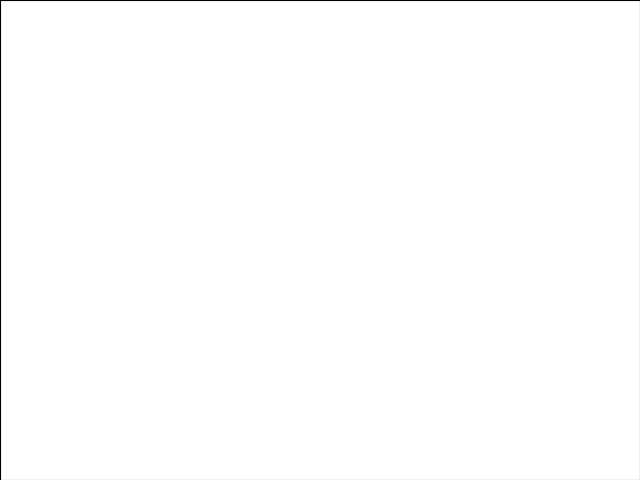

In [5]:
%matplotlib widget
x_data=[]
y_data=[]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
line, = ax.plot([], [], 'ro')
ax.set_xlim(( -20, 20))
ax.set_ylim((-20, 20))
ax.set_title("my_robot")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [6]:
def odom_callback(msg):
    global x_data, y_data
    y_data.append(msg.pose.pose.position.y)
    x_data.append(msg.pose.pose.position.x)
        
jr.subscribe('/odom', Odometry, odom_callback)

button = widgets.Button(description="Click Me!")
output = widgets.Output()

In [7]:
print('Every time click on the button the path is updated')
display(button, output)
#handle changes, the observe method of the widget can be used to register a callback.
def on_button_clicked(b):
    np_x_plot = np.array(x_data)
    np_y_plot = np.array(y_data)
    fig = plt.cla()
    ax.set_xlim(( -20, 20))
    ax.set_ylim((-20, 20))
    ax.plot(np_x_plot,np_y_plot)

Every time click on the button the path is updated


Button(description='Click Me!', style=ButtonStyle())

Output()

In [26]:
from sensor_msgs.msg import LaserScan
jr.subscribe('/scan',String ,lambda msg: print(msg))